#### Name: Pranav Mehendale
#### Roll No.: TCOD34
#### Batch: T11 

# Assignment 4 Group A

## Data Analytics I (Linear Regression)

Create a Linear Regression Model using Python R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/e/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.

## Data Description

 Variables in order:
 
 CRIM     per capita crime rate by town
 
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 
 INDUS    proportion of non-retail business acres per town
 
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 
 NOX      nitric oxides concentration (parts per 10 million)
 
 RM       average number of rooms per dwelling
 
 AGE      proportion of owner-occupied units built prior to 1940
 
 DIS      weighted distances to five Boston employment centres
 
 RAD      index of accessibility to radial highways
 
 TAX      full-value property-tax rate per $10,000
 
 PTRATIO  pupil-teacher ratio by town
 
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 LSTAT    percentage lower status of the population
 
 MEDV     Median value of owner-occupied homes in $1000's

### Importing Necessary Modules and Reading Data Set  

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.shape

(506, 14)

### Checking for null values in Data

In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### Copying Data to new Data Frame and deal with missing values

In [6]:
df2 = df.copy()
df2['rm'].interpolate(inplace=True)

In [7]:
df2.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
X = df2.iloc[:,0:13]
Y = df.iloc[:,-1]

### Splitting Training and Testing Data Set

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### Finding correlation between Dependent and independent variables

<Axes: >

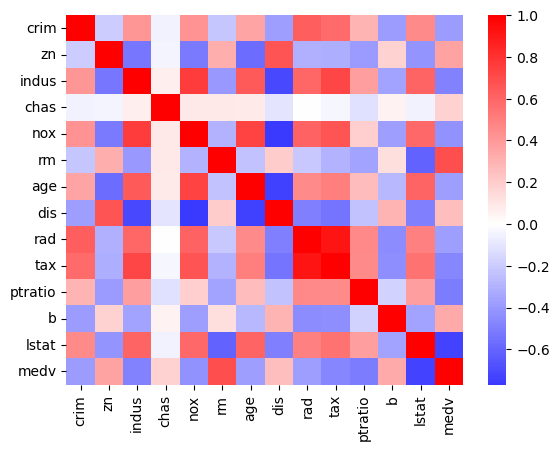

In [11]:
from seaborn import heatmap

data_correlation = df2.corr()
heatmap(data_correlation,cmap='bwr',center=0)

### Creating Pipeline and fitting the model

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [13]:
scaler = StandardScaler()
model= make_pipeline(scaler, LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

### Check Model Performance

In [14]:
model.score(X_test,y_test)

0.6703844390229792

 *It can be concluded that this model can predict dependent variable with 67.0384% accuracy.*

In [17]:
# Assuming your pipeline is named 'model'
scaler = model.named_steps['standardscaler']

In [18]:
coef = model.named_steps['linearregression'].coef_

In [19]:
inverse_transformed_coef = scaler.inverse_transform(coef.reshape(1, -1))

In [20]:
cdf = pd.DataFrame(inverse_transformed_coef.squeeze(), X_train.columns, columns=["Coeff"])
print("DataFrame with Inverse Transformed Coefficients:")
print(cdf)


DataFrame with Inverse Transformed Coefficients:
              Coeff
crim      -5.303660
zn        28.148333
indus     13.195798
chas       0.257046
nox        0.320733
rm         8.527995
age       64.322650
dis       -2.676540
rad       28.888441
tax      105.357159
ptratio   13.771765
b        459.721417
lstat    -13.425810


In [21]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Coefficient')

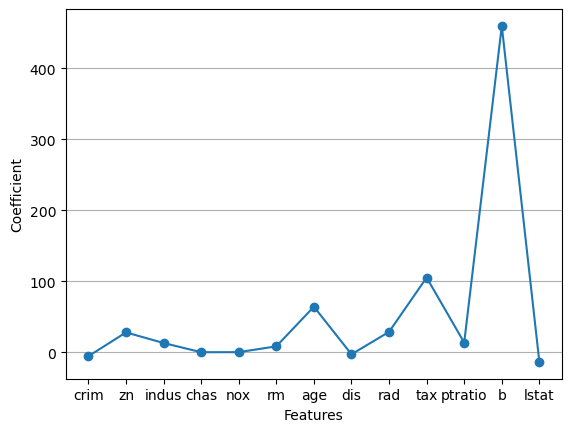

In [22]:
plt.plot(cdf, marker='o')

plt.grid(axis="y")
plt.xlabel("Features")
plt.ylabel("Coefficient")